In [1]:
import numpy as np
import cv2

def calculate_gradients(image):
    """
Calculates the gradients (Sobel operator) of intensity in a 2D intensity image.

Args:
    image: A 2D NumPy array representing the intensity image.

Returns:
    A tuple containing two NumPy arrays:
        - gx: Gradients in the x-direction (horizontal).
        - gy: Gradients in the y-direction (vertical).
    """
    kernel_size = (5, 5)
    sigma = 1
    blurred_image = cv2.GaussianBlur(image, kernel_size, sigma)

    # Sobel filter kernels
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    # Pad the image for edge handling (optional)
    # padded_image = np.pad(image, (1, 1), mode='edge')

    # Calculate gradients using convolution
    gx = cv2.filter2D(blurred_image, -1, sobel_x, borderType=cv2.BORDER_REPLICATE)
    gy = cv2.filter2D(blurred_image, -1, sobel_y, borderType=cv2.BORDER_REPLICATE)


    return gx, gy

In [2]:
from astropy.io import fits
filename = "/data_local/python_projects/fit_on_image_franco/20120808_120901_24h1A.fts"
#image = np.asarray(fits.getdata(filename))

with fits.open(filename) as hdul:
    image = hdul[0].data

#if image.dtype == np.float64:
#  image = (image * 255).astype(np.uint8)



#image2 = cv2.imread(filename)
#image = np.asarray(imageio.imread('your_image.jpg'))  # Load image using imageio
m=np.nanmean(image)
st=np.nanstd(image)
scl=3.5
vmin=m-st*scl
vmax=m+st*scl
image = (((image - vmin) ) / (vmax - vmin))


image2 = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  
# Gradients in x and y direction
gx, gy = calculate_gradients(image2)
gxx = np.where(np.isnan(gx), 0, gx)
gyy = np.where(np.isnan(gy), 0, gy)
# Further processing (optional)
# You can calculate the magnitude and direction of the gradient:
magnitude = np.sqrt(gxx**2 + gyy**2)
direction = np.arctan2(gyy, gxx) * 180 / np.pi

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'gy')

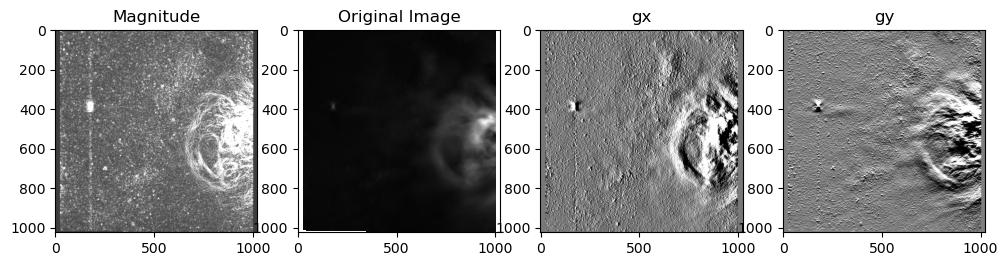

In [3]:
import matplotlib.pyplot as plt


m=np.nanmean(gxx)
st=np.nanstd(gxx)
scl=1.5
vmin=m-st*scl
vmax=m+st*scl
image_gxx = (((gxx - vmin) ) / (vmax - vmin))

m=np.nanmean(magnitude)
st=np.nanstd(magnitude)
scl=1.5
vmin=m-st*scl
vmax=m+st*scl
image_mag = (((magnitude - vmin) ) / (vmax - vmin))

m=np.nanmean(gyy)
st=np.nanstd(gy)
scl=1.5
vmin=m-st*scl
vmax=m+st*scl
image_gyy = (((gyy - vmin) ) / (vmax - vmin))

fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(12, 4))
ax1.imshow(image_mag, cmap='gray')
ax1.set_title('Magnitude')
ax2.imshow(image, cmap='gray')
ax2.set_title('Original Image')
ax3.imshow(image_gxx, cmap='gray')
ax3.set_title('gx')
ax4.imshow(image_gyy, cmap='gray')
ax4.set_title('gy')

